In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('dataset.csv',low_memory=False)

In [3]:
from collections import namedtuple
Orbit = namedtuple("Orbit", "e a i")
planets = {
    "Mercury": Orbit(0.206,  0.3871,  7.00),
    "Venus":   Orbit(0.007,  0.7233,  3.39),
    "Earth":   Orbit(0.017,  1.0000,  0.00),
    "Mars":    Orbit(0.093,  1.5273,  1.85),
    "Jupiter": Orbit(0.048,  5.2028,  1.31),
    "Saturn":  Orbit(0.056,  9.5388,  2.49),
    "Uranus":  Orbit(0.046, 19.1914,  0.77),
    "Neptune": Orbit(0.010, 30.0611,  1.77),
    "Pluto" :  Orbit(0.248, 39.5294, 17.15)
    }

to_perihelion = lambda a,e : a * (1 - e)
to_aphelion = lambda a,e : a * (1 + e)

def to_cdf( df, col):
    MAX_STEPS = 40000
    cdf = df.sort_values(by=col).reset_index(drop=True)
    cdf['percentile'] = 100*(cdf.index+1)/len(cdf)
    skip = 1 if len(cdf) < MAX_STEPS else len(cdf)//MAX_STEPS
    return cdf[::skip]

In [5]:
#The breakdown of the asteroids in the dataset by orbit class is as follows:
def summarize_by_class( df ):
    OrbitClass = {
        'AMO' : 'Amor',
        'APO' : 'Apollo',
        'AST' : 'Asteroid (other)',
        'ATE' : 'Aten',
        'CEN' : 'Centaur',
        'HYA' : 'Hyperbolic Asteroid',
        'IEO' : 'Atira',
        'IMB' : 'Inner Main-belt Asteroid',
        'MBA' : 'Main-belt Asteroid',
        'MCA' : 'Mars Crossing Asteroid',
        'OMB' : 'Outer Main-belt Asteroid',
        'TJN' : 'Jupiter Trojan',
        'TNO' : 'TransNeptunian Object'
        }

    _ = df['class'].value_counts()
    return pd.DataFrame({
        'class': _.index,
        'count': _,
        'orbit_class' : _.index.map( OrbitClass)
    }).reset_index(drop=True)

summarize_by_class(df)

,class,count,orbit_class
0,MBA,855954,Main-belt Asteroid
1,OMB,28355,Outer Main-belt Asteroid
2,IMB,20360,Inner Main-belt Asteroid
3,MCA,18685,Mars Crossing Asteroid
4,APO,12687,Apollo
5,AMO,8457,Amor
6,TJN,8221,Jupiter Trojan
7,TNO,3468,TransNeptunian Object
8,ATE,1729,Aten
9,CEN,506,Centaur


# Distribution Throughout the Solar System


In [7]:
ellipticals = df[ df['class'] != "HYA"][['a','e','class']]
ellipticals['perihelion'] = to_perihelion( ellipticals.a, ellipticals.e )
ellipticals['aphelion'] = to_aphelion( ellipticals.a, ellipticals.e )

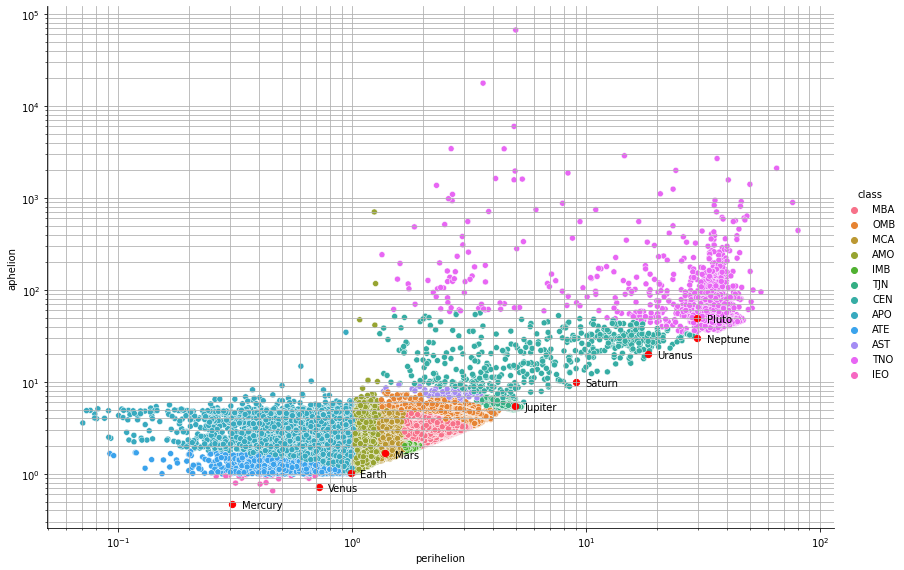

In [8]:
def plot_planets(names=planets.keys(), params=(1,1,200)):
    ax = plt.gca()
    scale_x, scale_y, size = params
    for name in names:
        orbit = planets[name]
        perihelion = to_perihelion( orbit.a, orbit.e)
        aphelion = to_aphelion( orbit.a, orbit.e)
        plt.scatter( perihelion, aphelion, c='red', s=size)
        plt.text( scale_x*perihelion, scale_y*aphelion, name)

sns.relplot( data=ellipticals, x='perihelion',y='aphelion', hue='class', height=8, aspect=12/8)
plot_planets(params=(1.1,0.9,40))

plt.minorticks_on()
plt.grid(which='both')
plt.xscale('log')
plt.yscale('log')

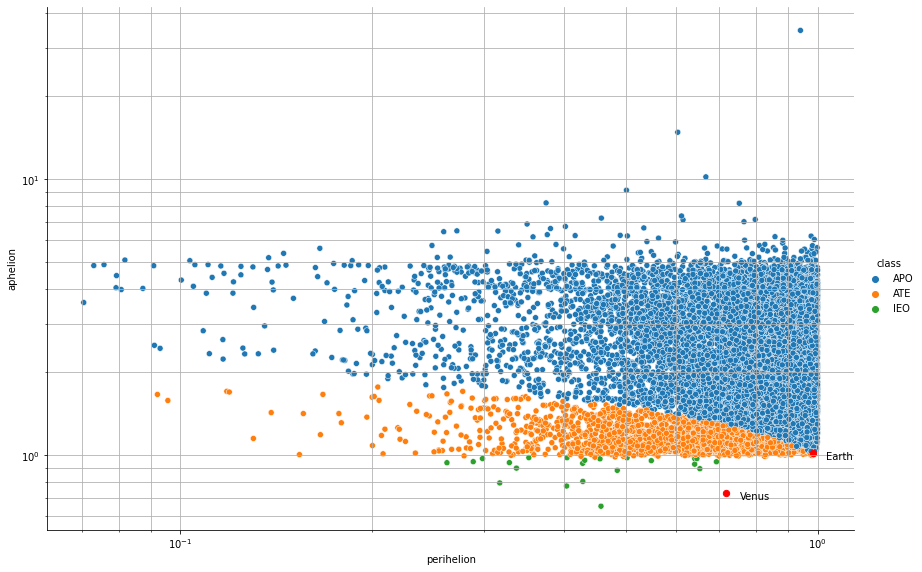

In [9]:
inner=ellipticals[ellipticals.perihelion < 1]
sns.relplot( data=inner, x='perihelion',y='aphelion', hue='class', height=8, aspect=12/8)
plot_planets( ['Venus', 'Earth'], params=(1.05, 0.95, 40))
plt.minorticks_on()
plt.grid(which='both')
plt.xscale('log')
plt.yscale('log')

# Potential hazardous asteroids near the Earth

In [11]:
print("Counts of Apollos and Atens")
display( df['class'].value_counts()[ ['APO', 'ATE'] ] )

print("\nCounts of Potentially Hazardous Asteroids")
PHAs = df[ (df.pha == 'Y')][['class', 'e','a']]
display( PHAs['class'].value_counts())

Counts of Apollos and Atens


APO    12687
ATE     1729
Name: class, dtype: int64


Counts of Potentially Hazardous Asteroids


APO    1768
ATE     174
AMO     118
IEO       6
Name: class, dtype: int64

# Asteroid classification near Earth

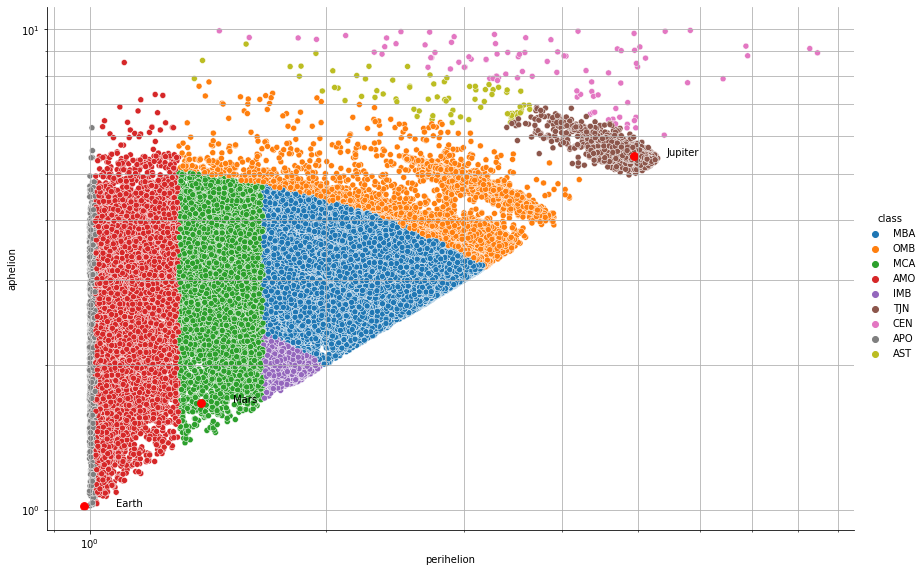

In [12]:
mid = ellipticals[ 
    (ellipticals.perihelion > 1) & 
    (ellipticals.perihelion < 10) &
    (ellipticals.aphelion < 10)
    ]
sns.relplot( data=mid, x='perihelion',y='aphelion', hue='class', height=8, aspect=12/8)
plot_planets( ['Earth','Mars','Jupiter'], params=(1.1, 1, 60))
plt.minorticks_on()
plt.grid(which='both')
plt.xscale('log')
plt.yscale('log')